# Census Income 

https://github.com/tejaswi433/Census-Income-prediction/blob/master/prediction_noteb.ipynb

https://github.com/Data-Citadel/census_income_prediction/blob/master/Question1_Census_Income_Prediction.ipynb

Project Description<br>
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).<br>
Description of fnlwgt (final weight)<br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:<br>
1.	A single cell estimate of the population 16+ for each state.<br>
2.	Controls for Hispanic Origin by age and sex.<br>
3.	Controls by Race, age and sex.<br>
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.<br>
People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


 prediction task is to determine whether a person makes over $50K a year.

1.Data Loading Start the Data analysis by importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

read the csv dataset

In [4]:
df=pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


2.EDA

In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

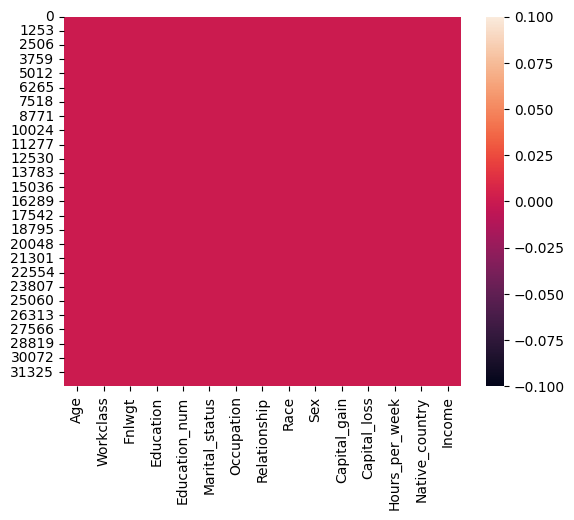

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df.duplicated().sum()

24

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical columns are: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


In [14]:
for i in ccol:
    unique_objects_count = df[i].value_counts()
    print(f"Number of unique values in {i}: {len(df[i].unique())}")
    print(unique_objects_count)
    print()

Number of unique values in Workclass: 9
Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Number of unique values in Education: 16
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

Number of unique values in Marital_status: 7
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spous

In [15]:
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

In [16]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The dataset contains information on 30,138 individuals, with features such as age, final weight, education level (numerically represented), capital gain, capital loss, and hours per week. On average, individuals are approximately 38 years old, with a diverse range of ages from 17 to 90.<br>
The final weight, representing the survey sampling weight, varies widely.<br> Education levels range from 1 to 16, with a mean of about 10.12. <br>Capital gain and capital loss exhibit substantial variability, while the average weekly working hours are around 40.94. 

# Data Visualization

Uni-varient analysis

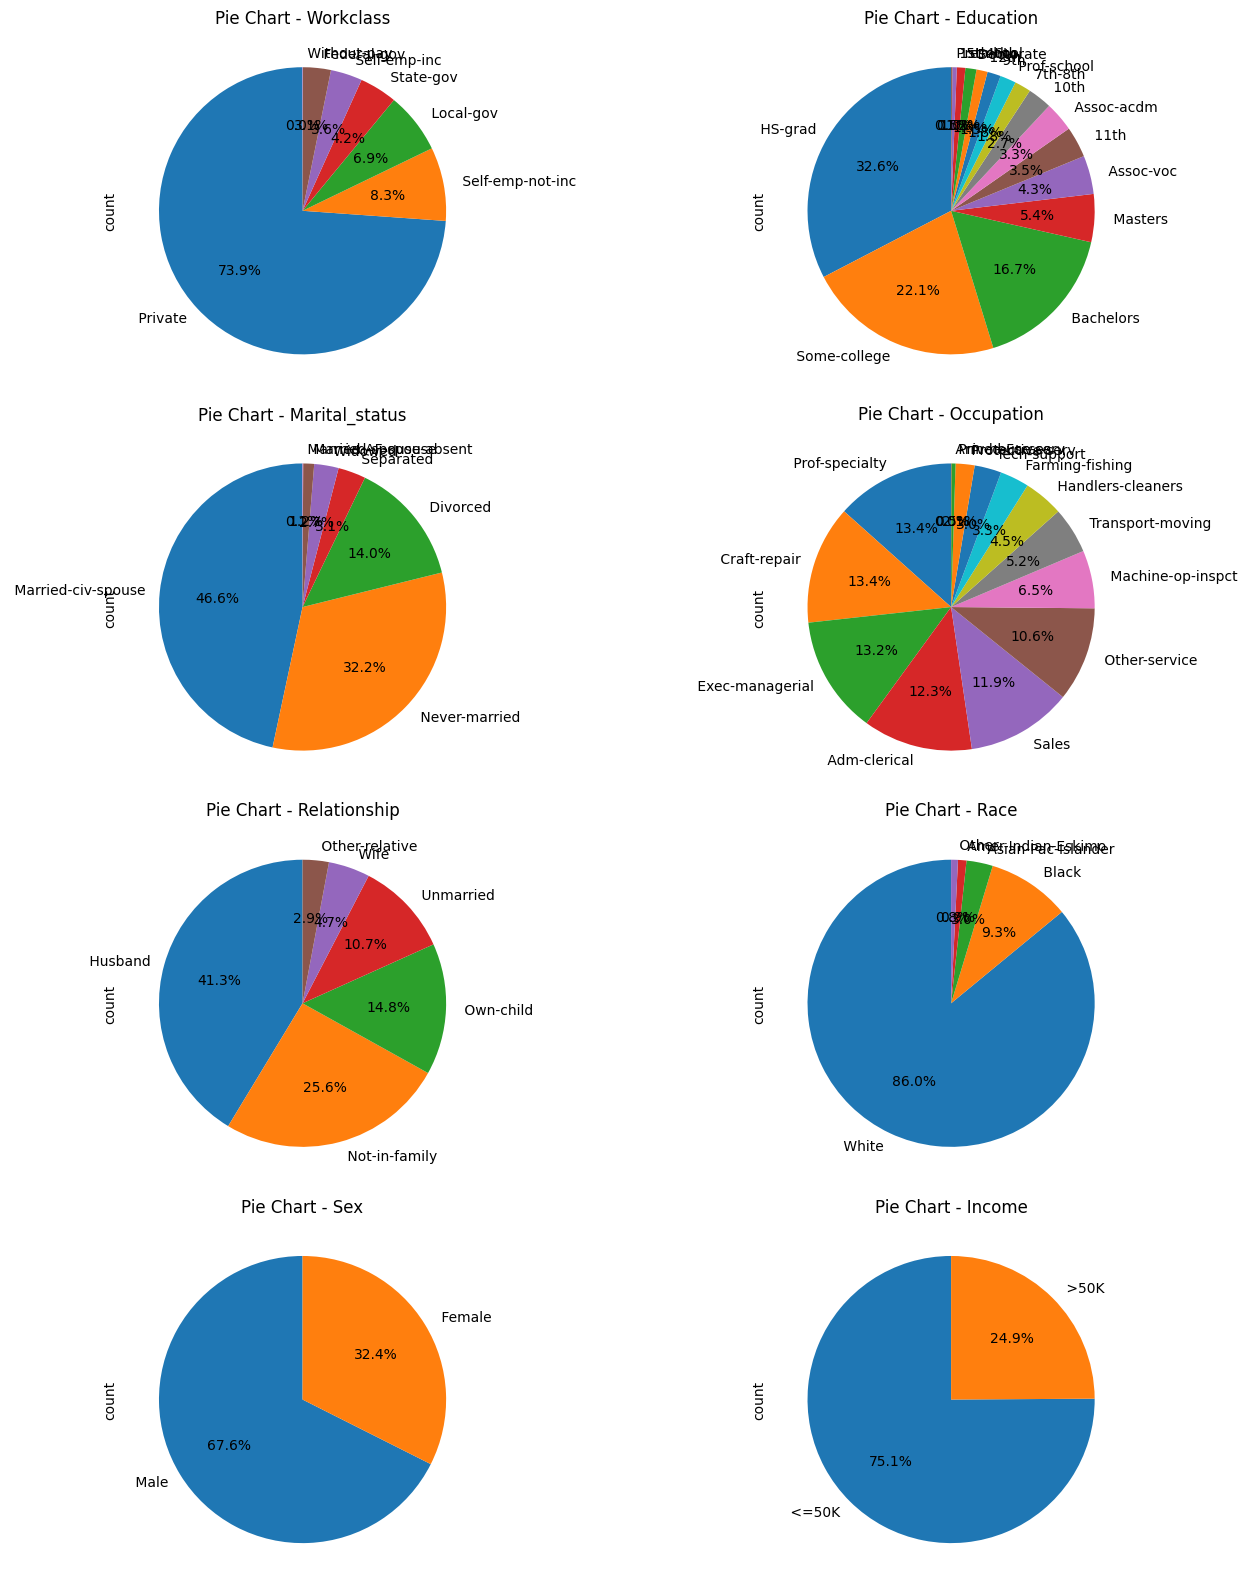

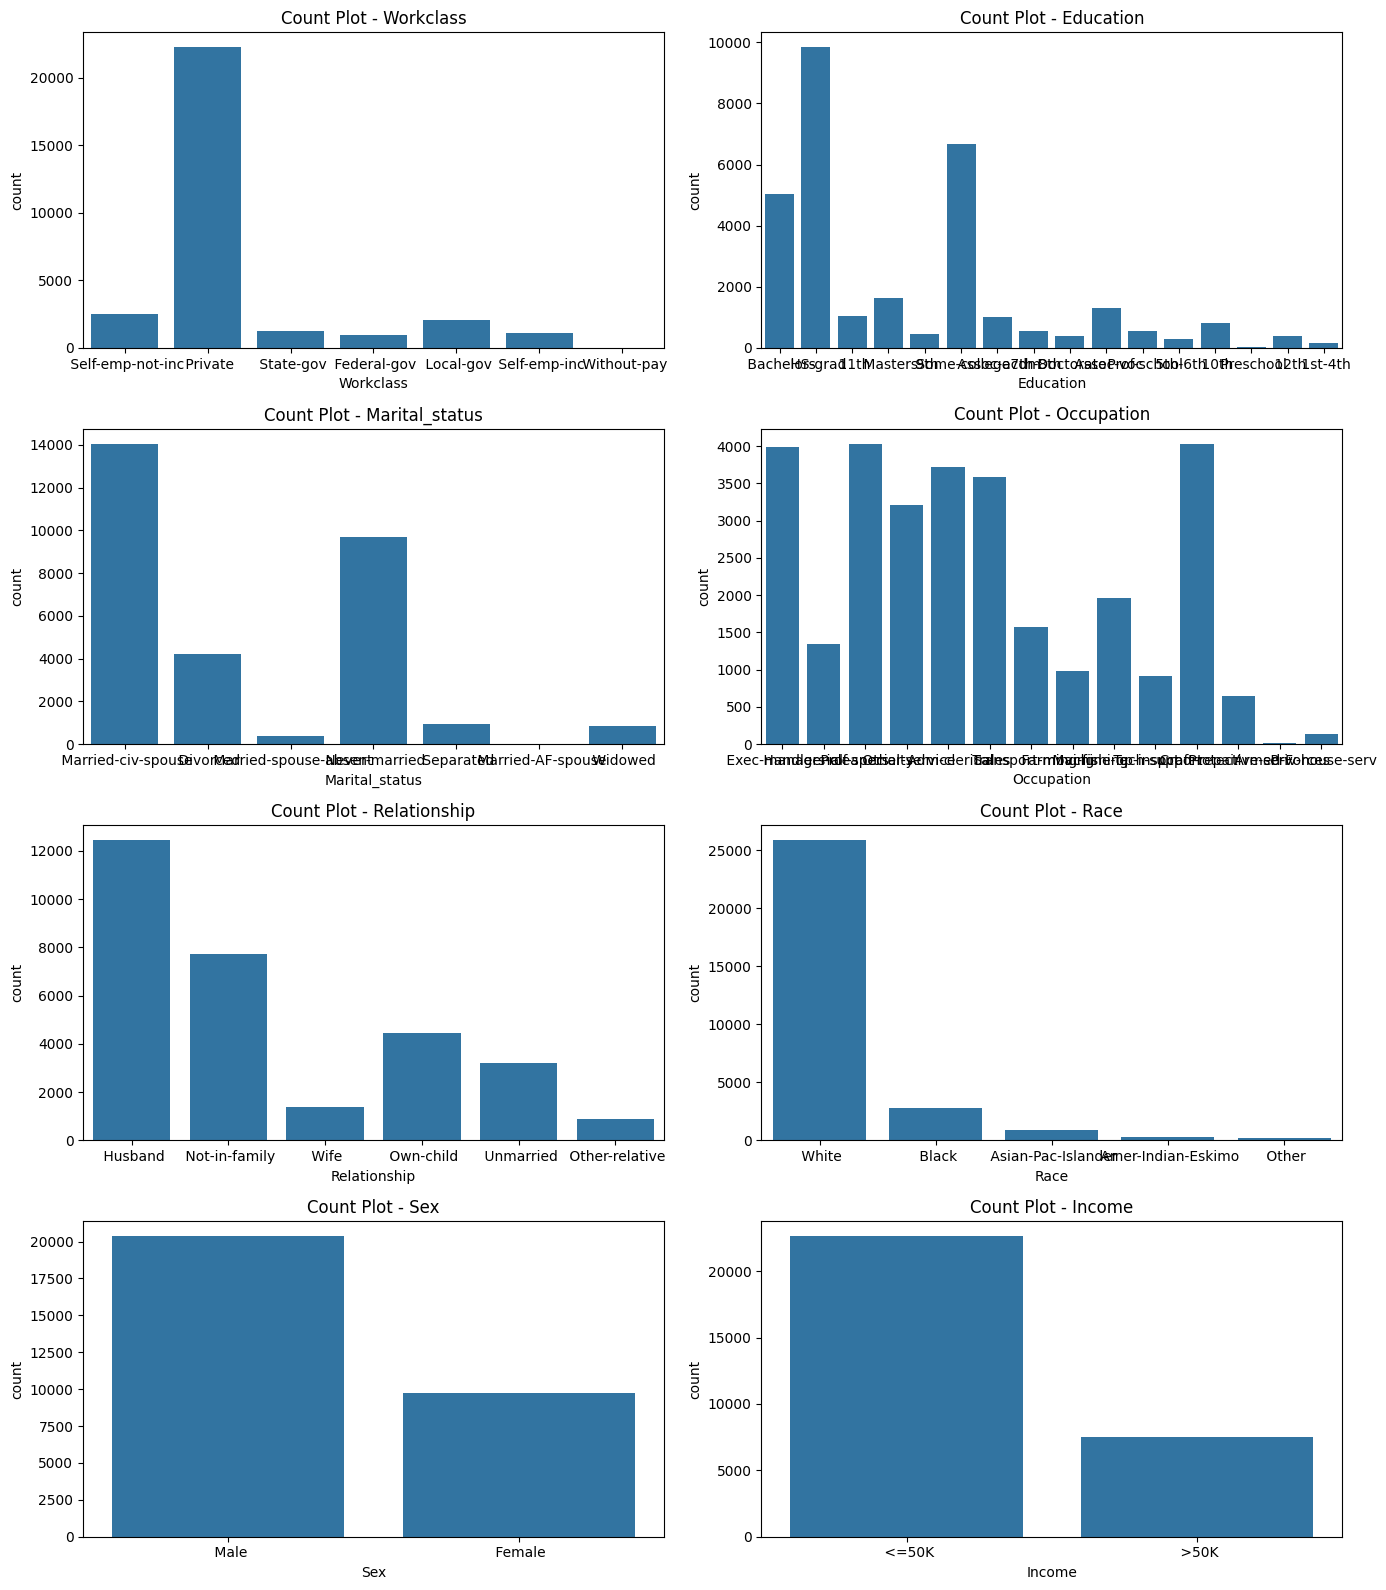

In [18]:
cat=['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Income']
fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()
# for pie
for i, column in enumerate(cat):
    df[column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(f'Pie Chart - {column}') 

plt.tight_layout()
plt.show()
# for count
fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()

for i, column in enumerate(cat):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot - {column}')

plt.tight_layout()
plt.show()


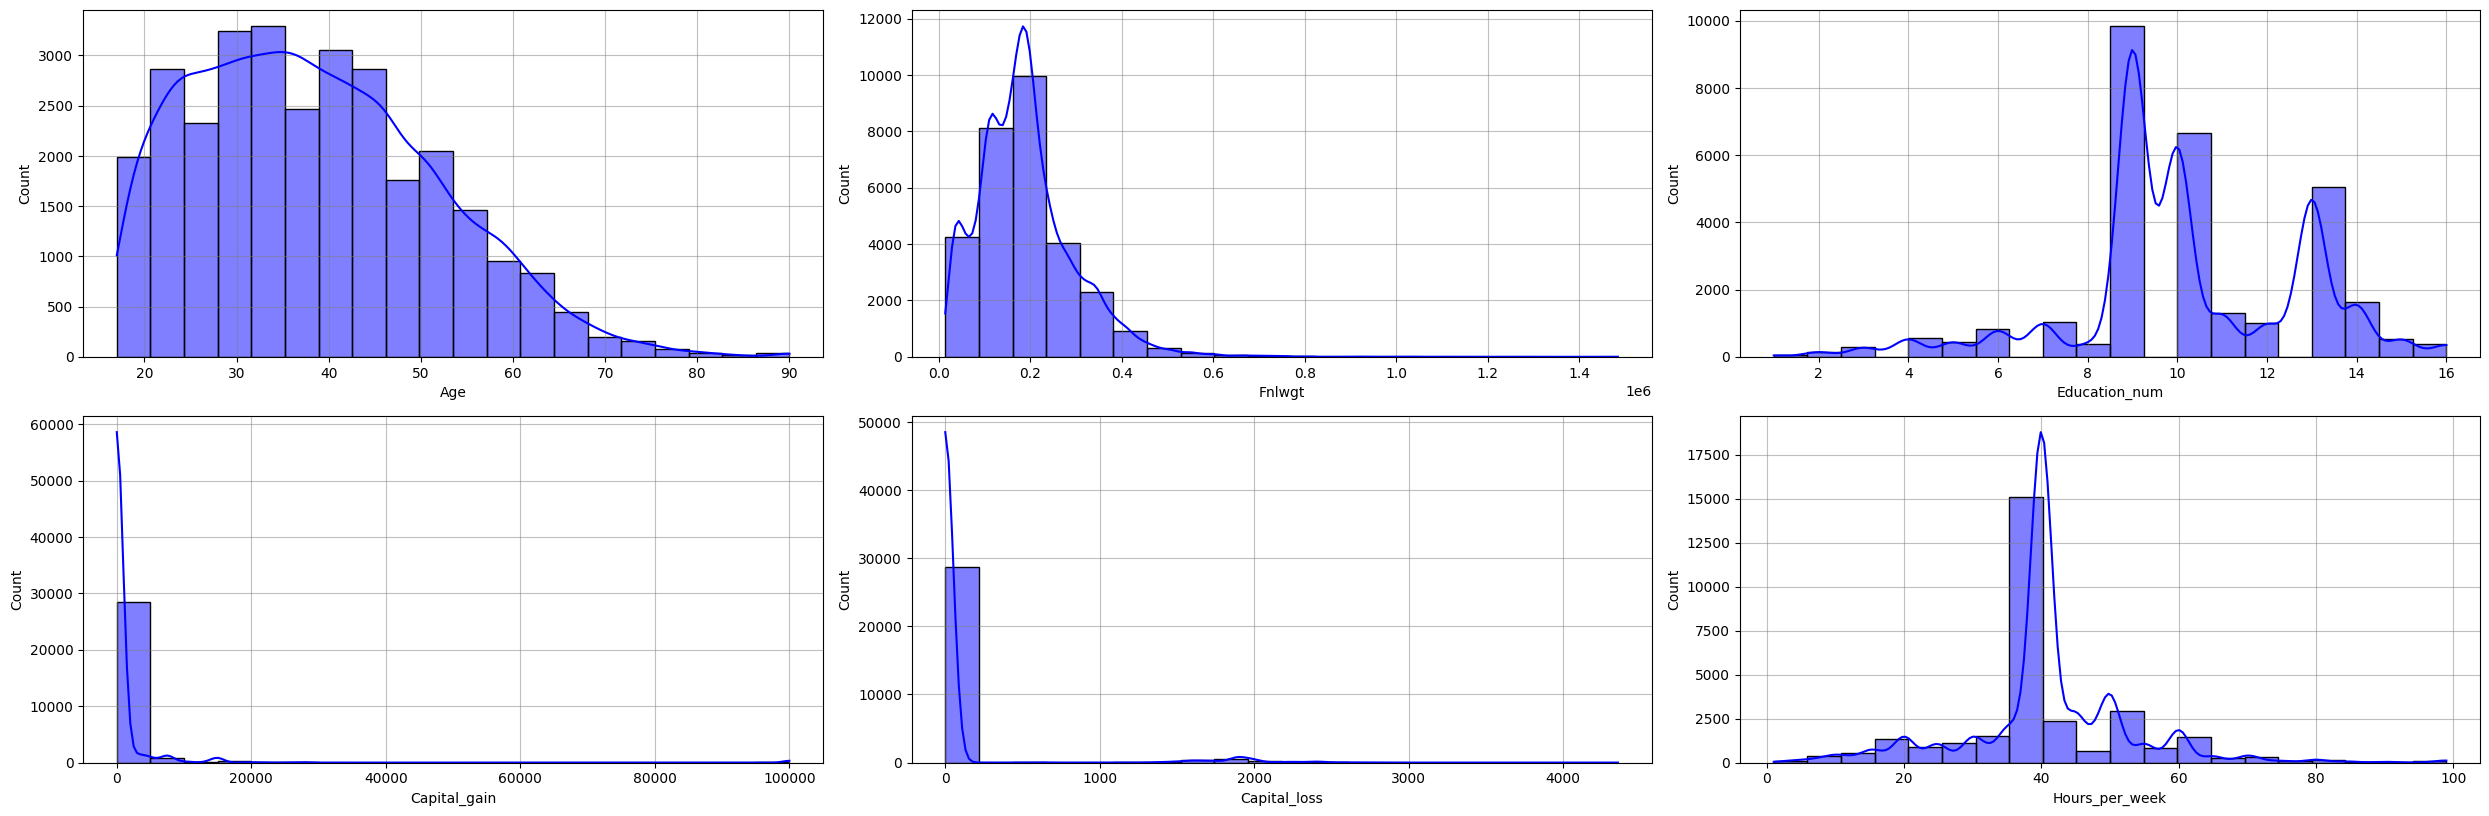

In [19]:
plt.figure(figsize=(25, 20))
pltno = 1

for i in ncol:
    if pltno <= 36:
        ax = plt.subplot(5, 3, pltno)
        sns.histplot(df[i], kde=True, color='blue', bins=20)
        plt.xlabel(i)
        plt.grid(True, alpha=0.5, color='gray')
    pltno += 1

plt.tight_layout()
plt.show()

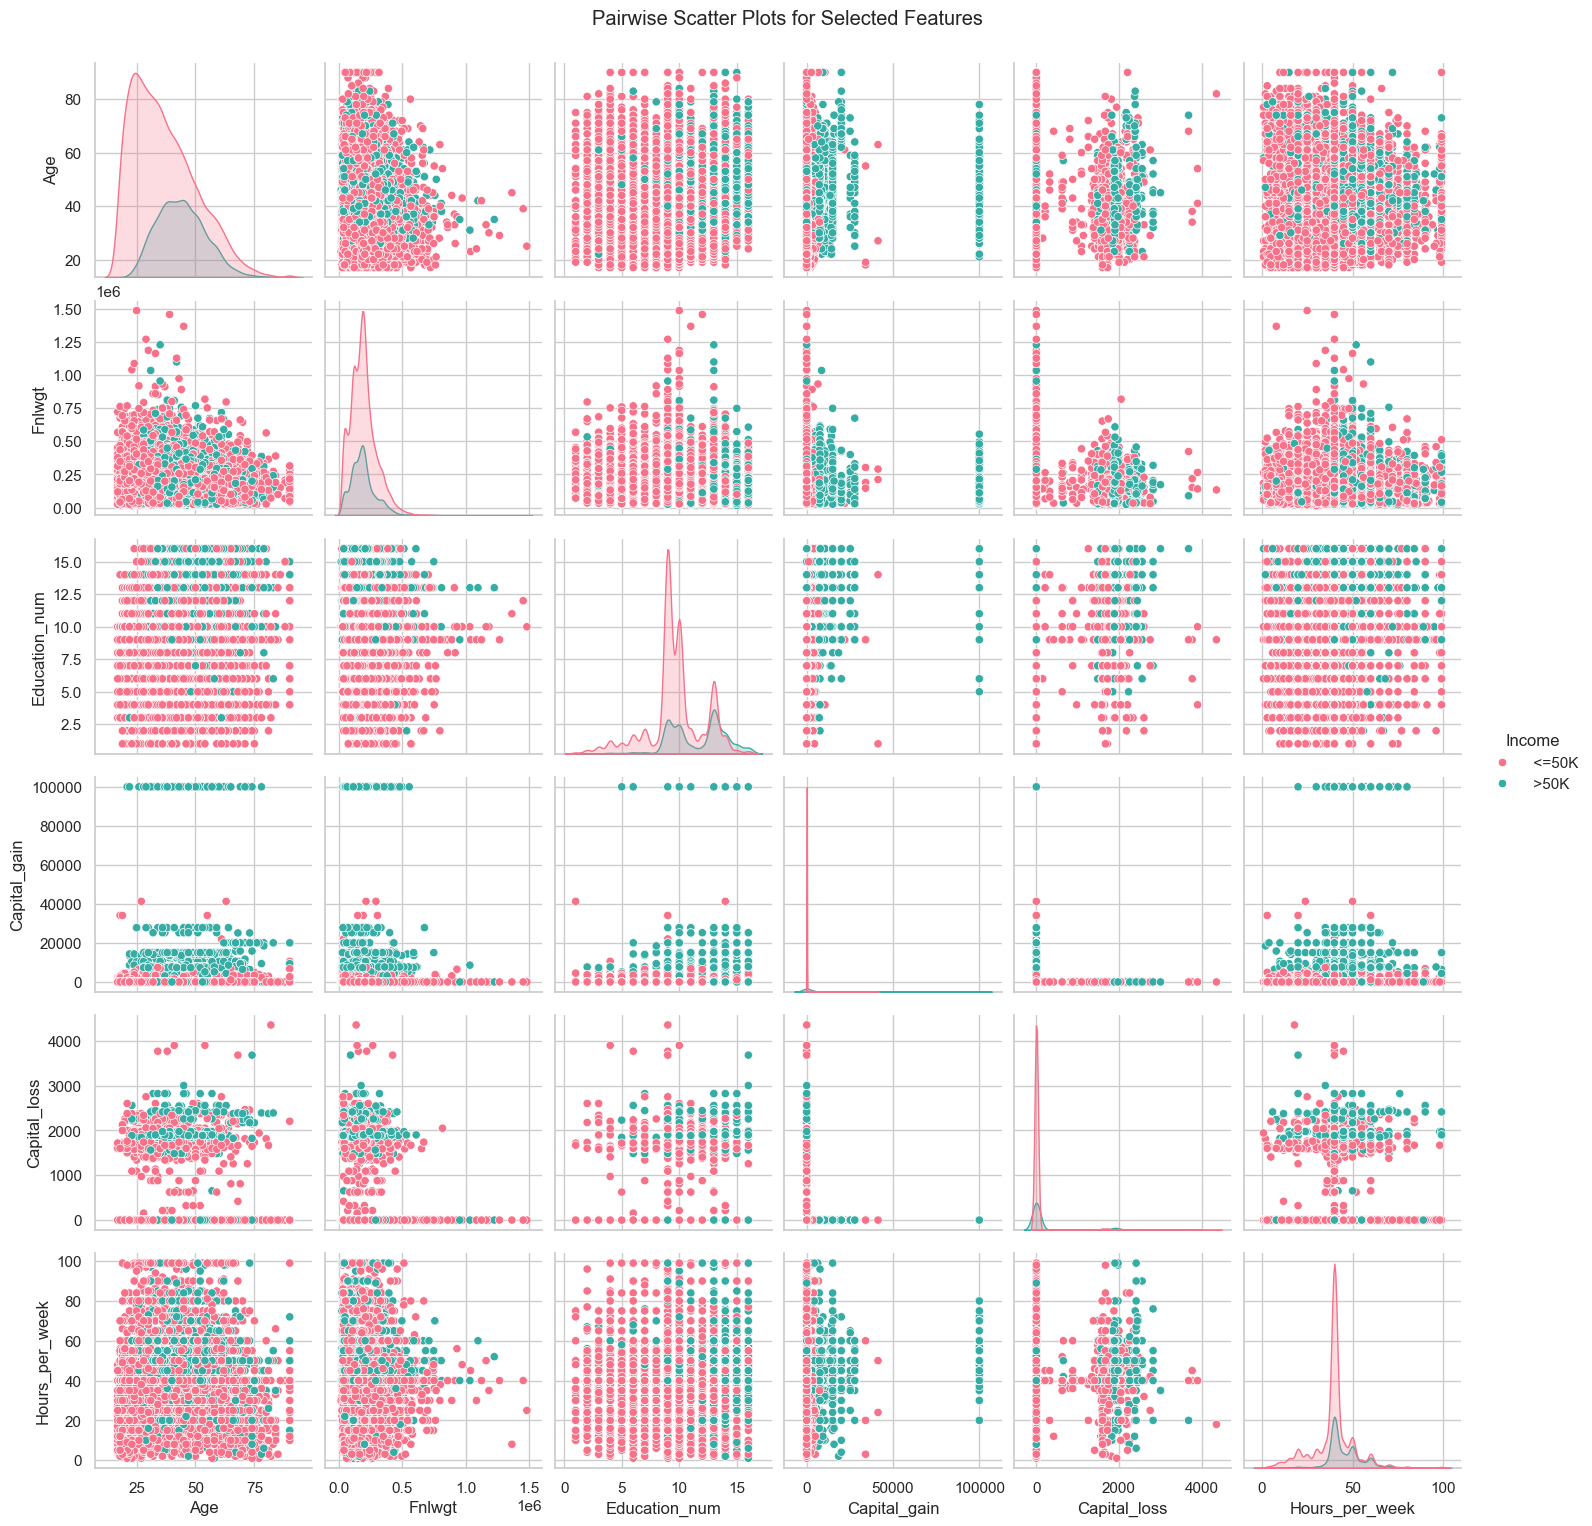

In [20]:
cat = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

sns.set(style="whitegrid")
sns.pairplot(df[cat + ['Income']], hue='Income', palette='husl')
plt.suptitle("Pairwise Scatter Plots for Selected Features", y=1.02)
plt.show()

LabelEncode for categorical data

In [21]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


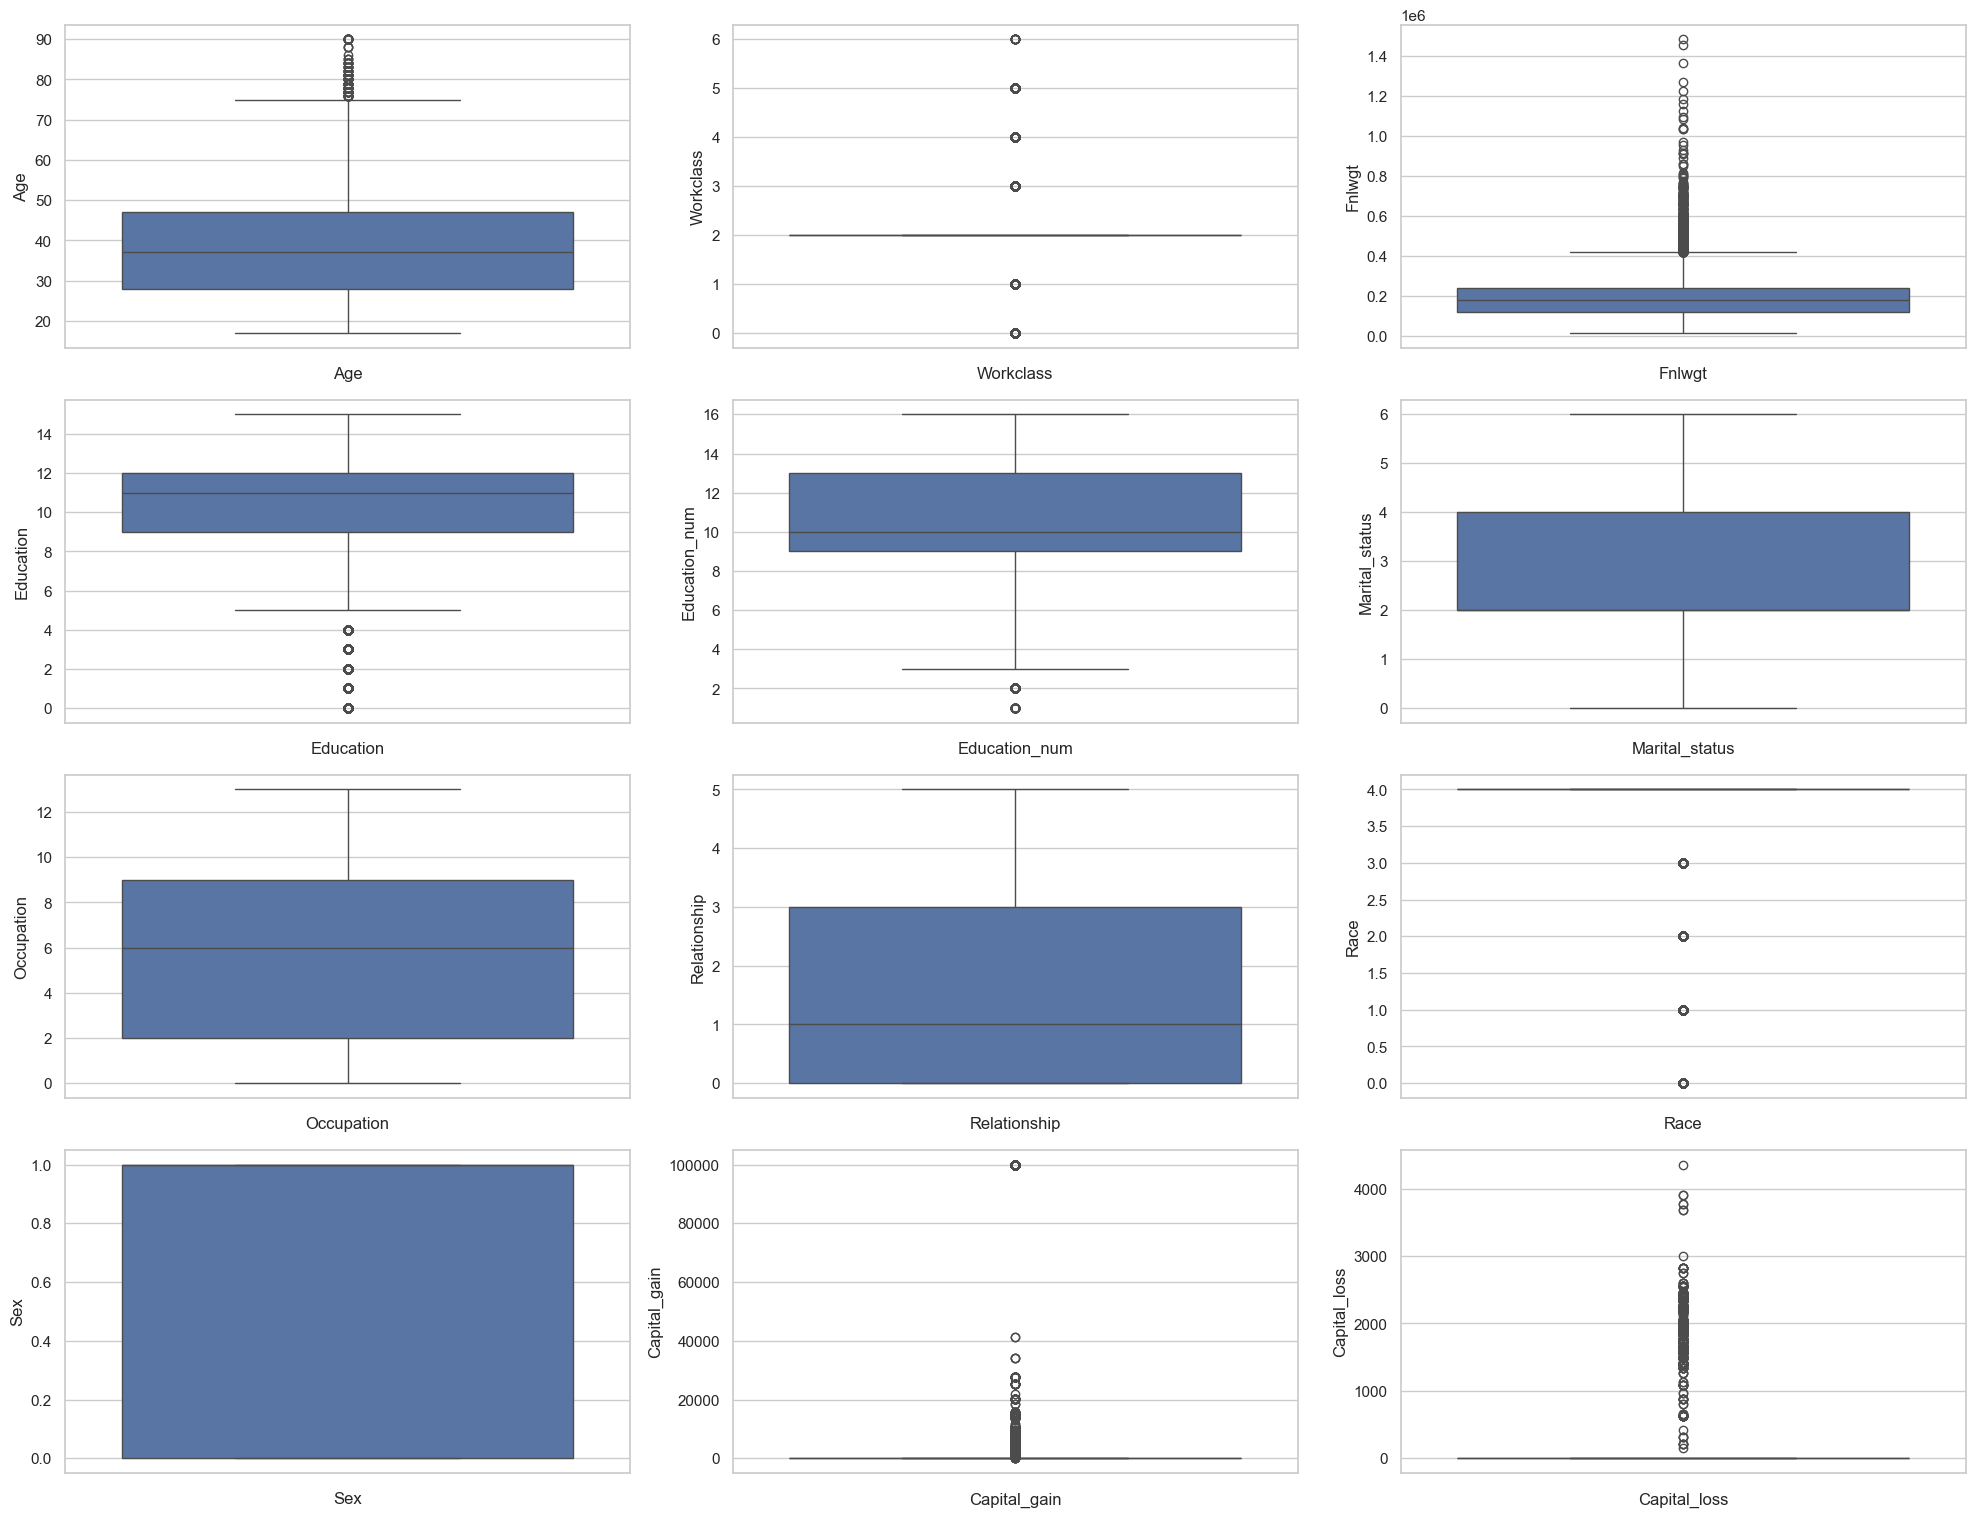

In [22]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [23]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [24]:
col = ['Workclass', 'Education', 'Education_num', 'Capital_gain', 'Capital_loss']
z = np.abs(zscore(df[col]))

threshold = 3
df1 = df[(z < threshold).all(axis=1)]

In [25]:
df1.shape

(28359, 15)

In [26]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  5.902846904240494


In [27]:
df=df1

Heatmap for checking correlation

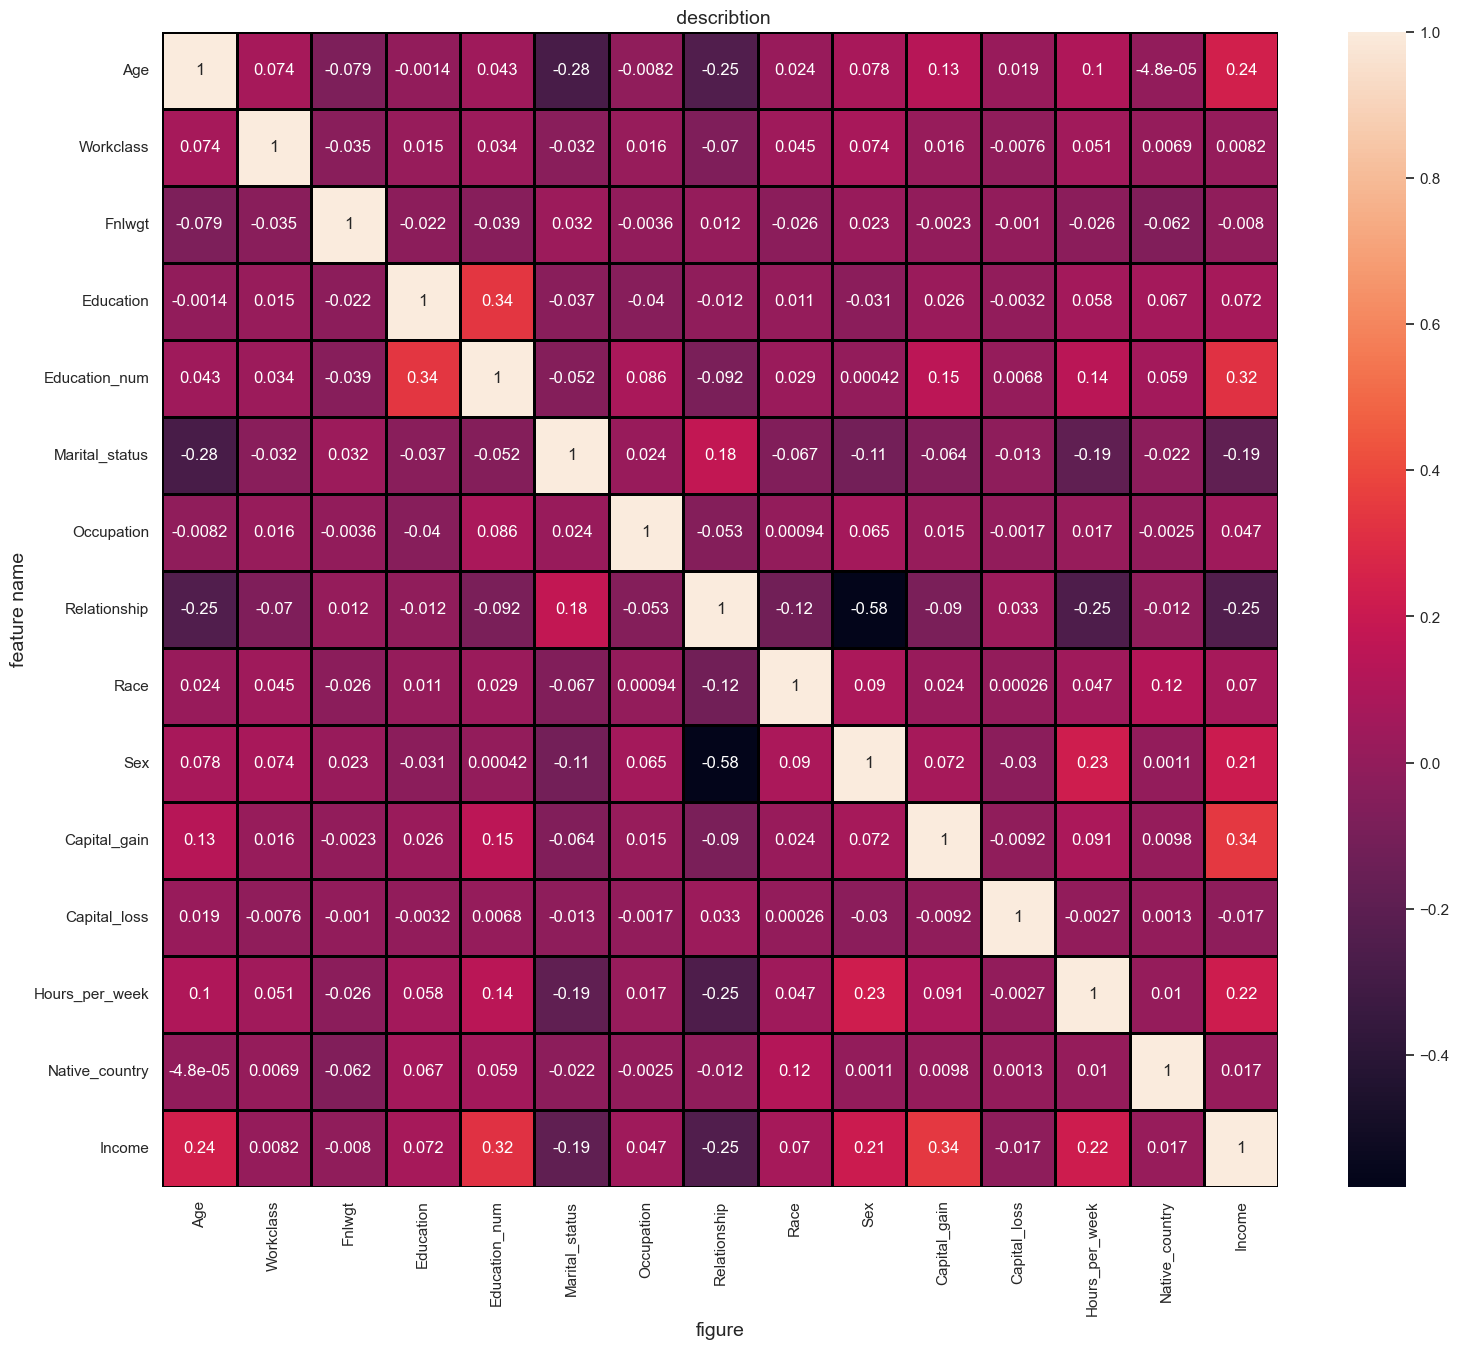

In [28]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

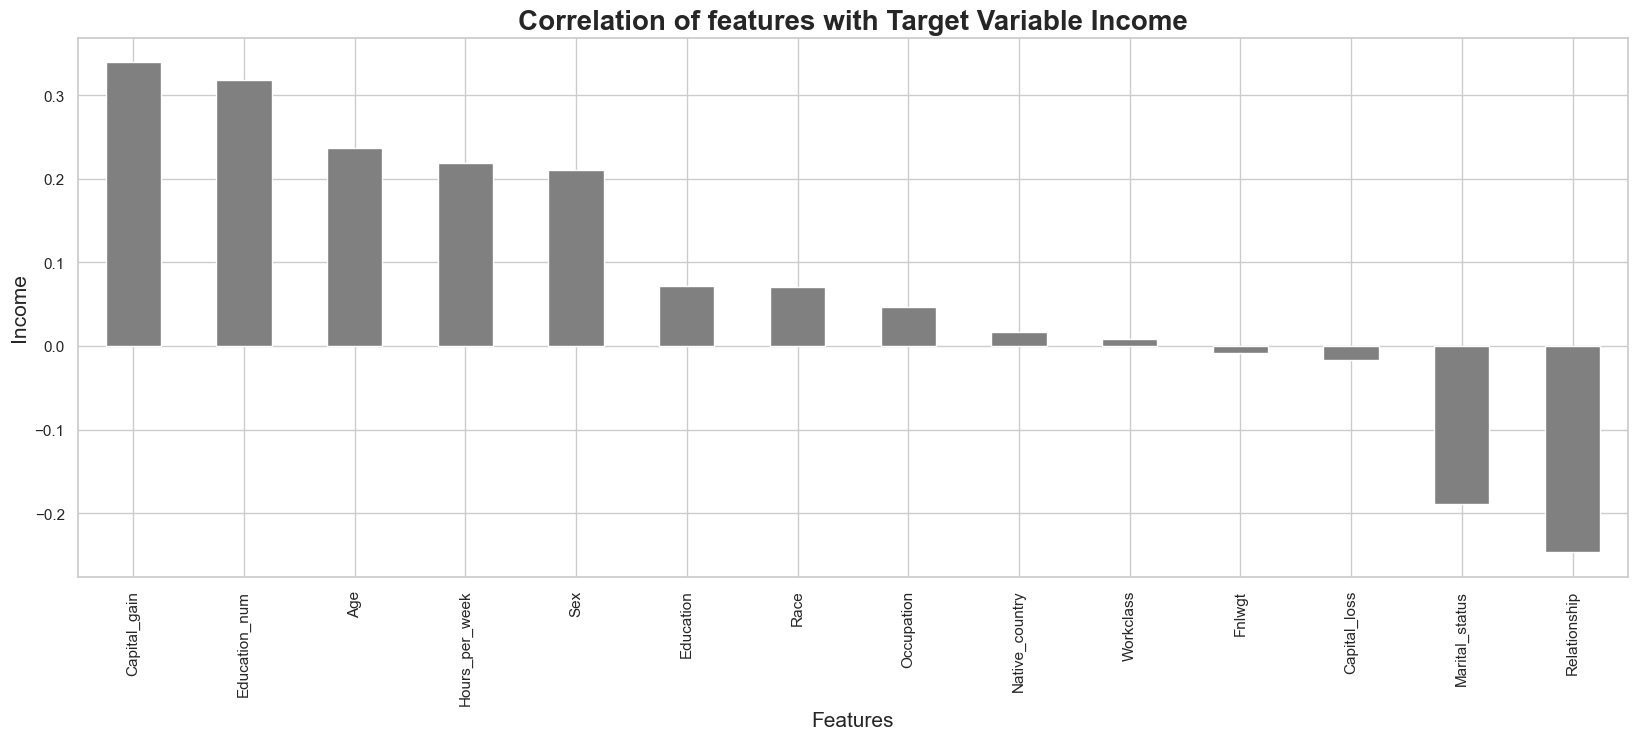

In [29]:
plt.figure(figsize = (20,7))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 20,fontweight='bold')
plt.show()

In [30]:
df.skew()

Age                0.546647
Workclass          1.161799
Fnlwgt             1.479208
Education         -0.952884
Education_num     -0.160832
Marital_status    -0.034798
Occupation         0.114632
Relationship       0.783912
Race              -2.483929
Sex               -0.719467
Capital_gain       4.856539
Capital_loss      29.391942
Hours_per_week     0.330704
Native_country    -4.272872
Income             1.271591
dtype: float64

In [31]:
col= [ 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
                  'Occupation', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss',
                  'Hours_per_week', 'Native_country']
for column in col:
    if df[column].skew() > 1:
        df[column] = np.log1p(df[column])

In [32]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [33]:
y.value_counts()

Income
0    21787
1     6572
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [35]:
y1.value_counts()

Income
0    21787
1    21787
Name: count, dtype: int64

In [36]:
print(x.shape, y.shape)

(28359, 14) (28359,)


In [37]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [39]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (19851, 14)
Testing set size -  (8508, 14)


In [40]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [41]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
value.score(x_train,y_train)

0.864339327993552

In [43]:
value.score(x_test,y_test)

0.8594264221908792

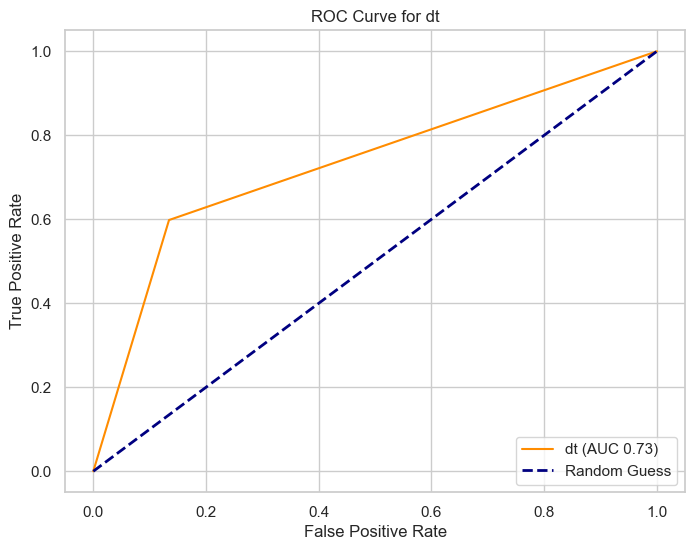


ROC AUC for dt: 0.73


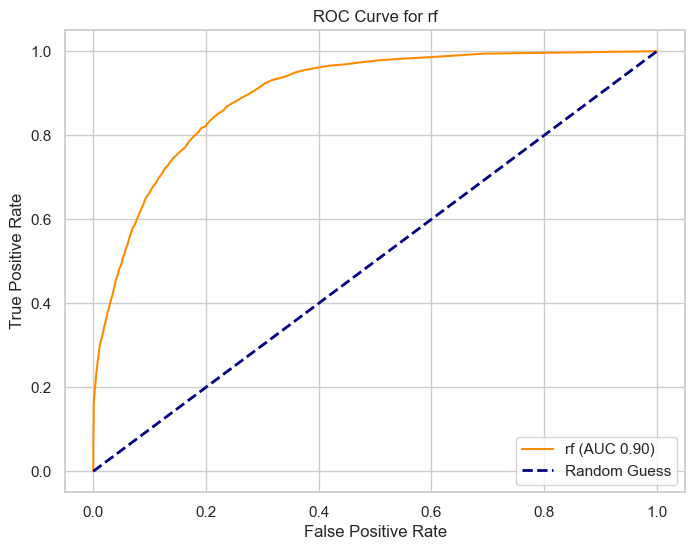


ROC AUC for rf: 0.90


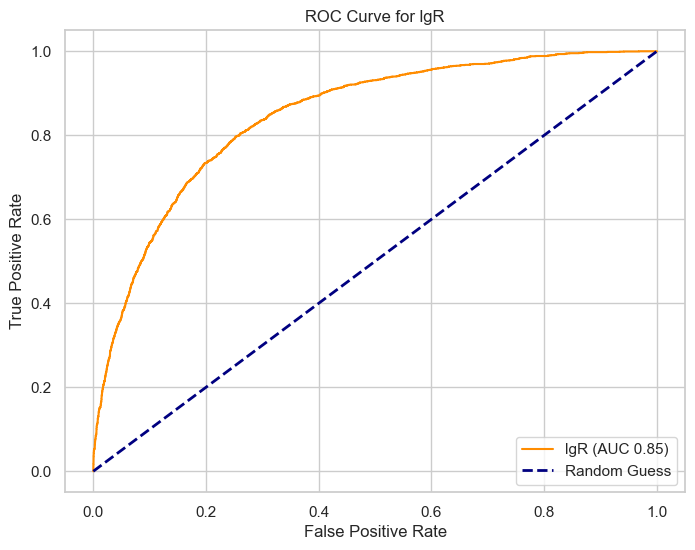


ROC AUC for lgR: 0.85


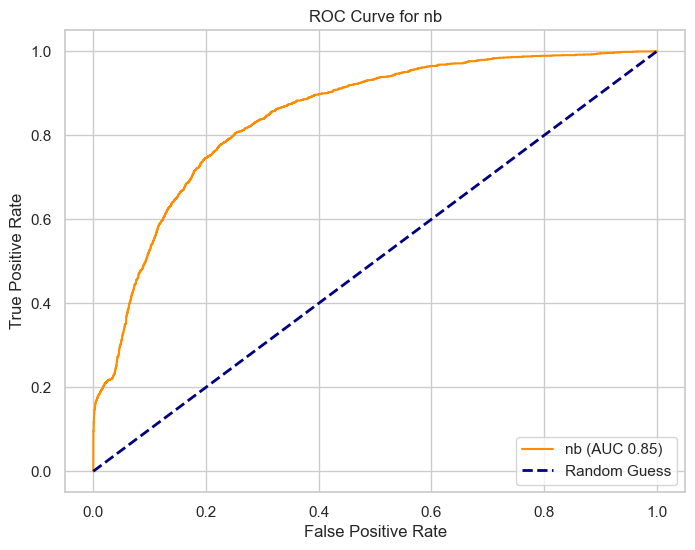


ROC AUC for nb: 0.85


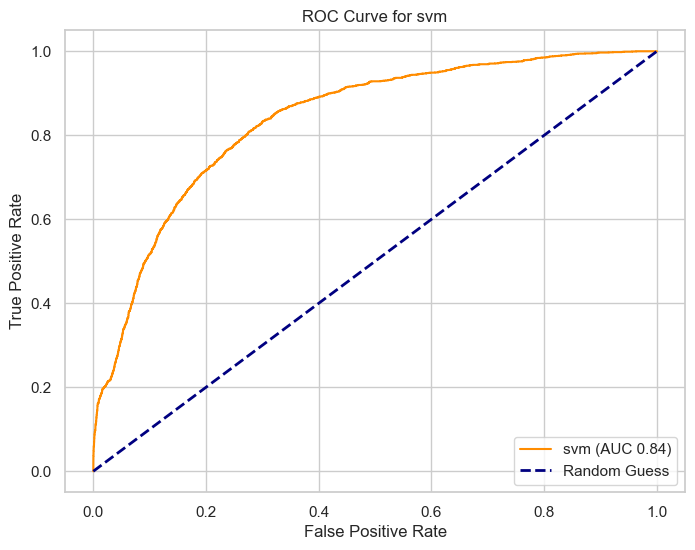


ROC AUC for svm: 0.84


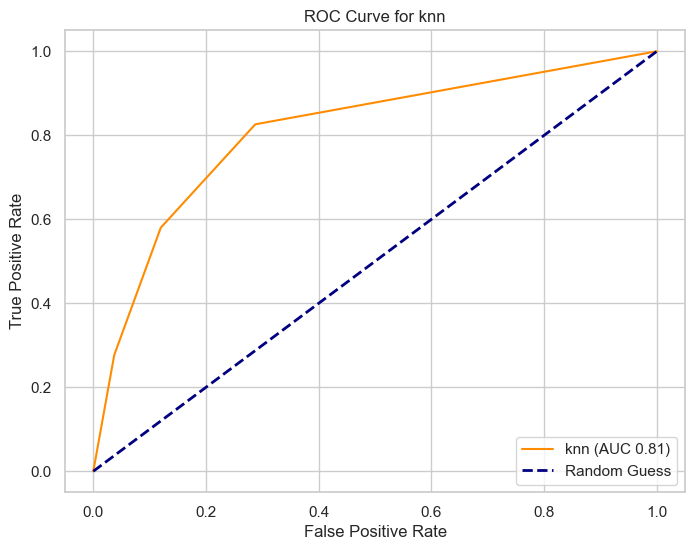


ROC AUC for knn: 0.81


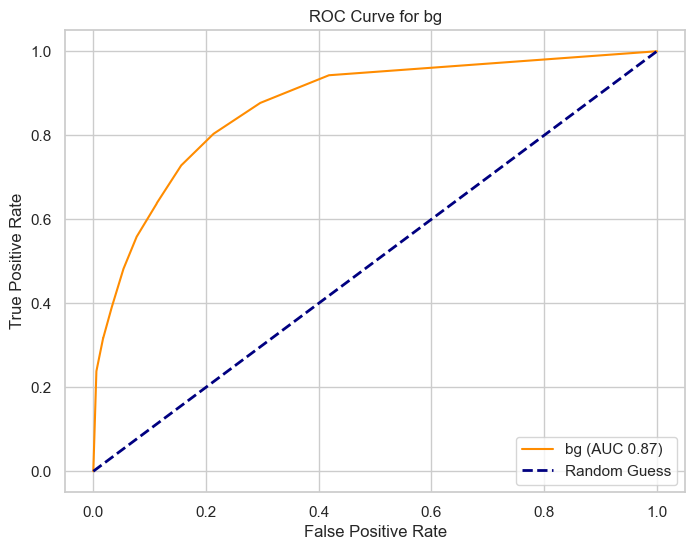


ROC AUC for bg: 0.87


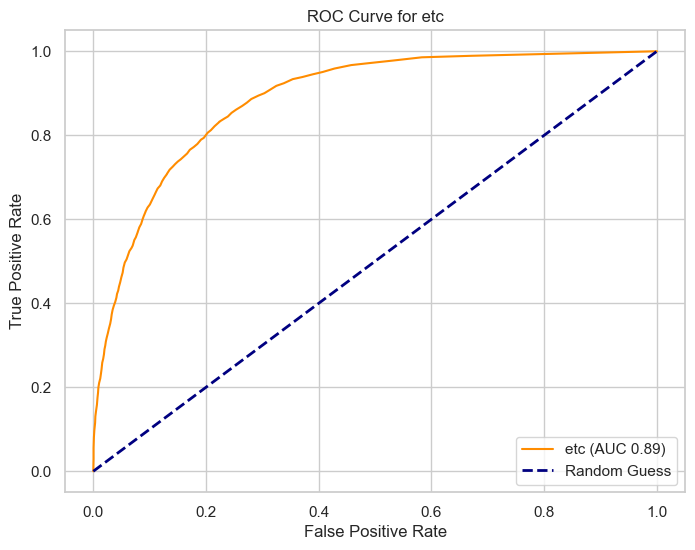


ROC AUC for etc: 0.89


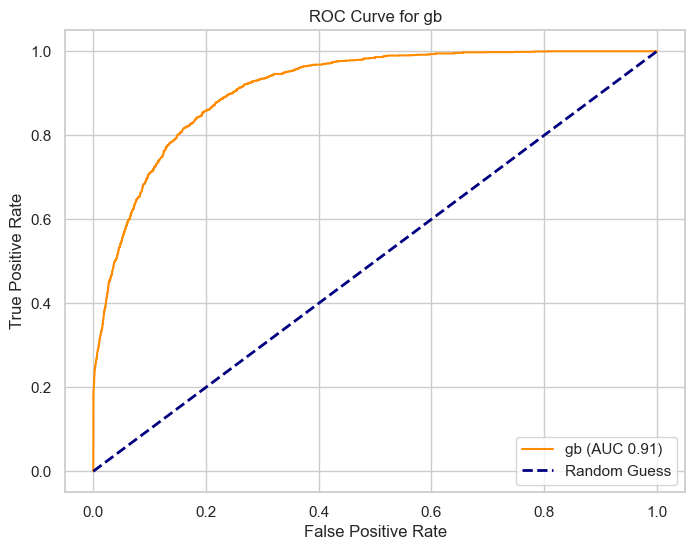


ROC AUC for gb: 0.91

R-squared: {'dt': -0.1092059726579171, 'rf': 0.14291661162632374, 'lgR': -0.02449812026612186, 'nb': -0.24260416540090168, 'svm': -0.14122153891623346, 'knn': -0.06851952387130678, 'bg': 0.09089131645655979, 'etc': 0.09889520802113883, 'gb': 0.20227880739695192}

Root Mean Squared Error: {'dt': 0.44211208257522583, 'rf': 0.3886313428422857, 'lgR': 0.4248952413825158, 'nb': 0.46794271104276597, 'svm': 0.44844714571638805, 'knn': 0.4339278407120163, 'bg': 0.400252623564703, 'etc': 0.39848679455520836, 'gb': 0.3749314308098493}

Accuracy: {'dt': 0.8045369064409967, 'rf': 0.8489656793606017, 'lgR': 0.8194640338504936, 'nb': 0.7810296191819464, 'svm': 0.7988951574988247, 'knn': 0.811706629055007, 'bg': 0.8397978373295721, 'etc': 0.8412082745651152, 'gb': 0.8594264221908792}

Best Model based on Accuracy: gb

Best Model based on RMSE: gb


In [44]:
y_probs = {}
mae = {}
mse = {}
r2 = {}
rmse = {}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value) 

    # Check if predict_proba is available
    if hasattr(model[key], 'predict_proba') and callable(getattr(model[key], 'predict_proba')):
        y_probs[key] = model[key].predict_proba(x_test)[:, 1]
    else:
        # Use decision_function for models that don't support predict_proba
        y_probs[key] = model[key].decision_function(x_test) if hasattr(model[key], 'decision_function') else value

    fpr, tpr, thresholds = roc_curve(y_test, y_probs[key])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label='{} (AUC {:.2f})'.format(key, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {key}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"\nROC AUC for {key}: {roc_auc:.2f}")

print("\nR-squared:", r2)
print("\nRoot Mean Squared Error:", rmse)
print("\nAccuracy:", acu)

best_model = max(acu, key=acu.get)
print("\nBest Model based on Accuracy:", best_model)

best_model_rmse = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model_rmse)


In [45]:
mod=GradientBoostingClassifier()
mod.fit(x_train,y_train)

GradientBoostingClassifier()

In [46]:
y_pred=mod.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[6190  375]
 [ 821 1122]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6565
           1       0.75      0.58      0.65      1943

    accuracy                           0.86      8508
   macro avg       0.82      0.76      0.78      8508
weighted avg       0.85      0.86      0.85      8508



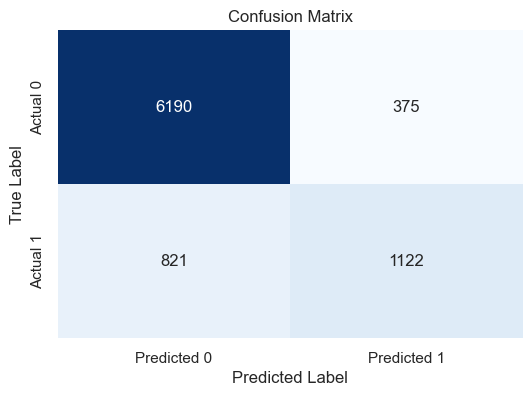

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

True [0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
Pred [0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
